In [1]:
!pip install scikit-learn

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import sklearn.metrics
from sklearn.metrics import DistanceMetric
from sklearn.svm import SVC
%matplotlib inline
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay,roc_auc_score)

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data Preprocessing

In [4]:
fcr = pd.read_csv ('Fuel Consumption Ratings.csv') #load datasets

In [5]:
fcr.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUEL,FUELCONSUMPTIONCITY,FUELCONSUMPTIONHWY,FUELCONSUMPTIONCOMB,FUELCONSUMPTIONCOMBMPG,CO2EMISSIONS
0,2010,ACURA,CSX,COMPACT,2.0,4,AS5,X,10.9,7.8,9.5,30,219
1,2010,ACURA,CSX,COMPACT,2.0,4,M5,X,10.0,7.6,8.9,32,205
2,2010,ACURA,CSX,COMPACT,2.0,4,M6,Z,11.6,8.1,10.0,28,230
3,2010,ACURA,MDX AWD,SUV,3.7,6,AS6,Z,14.8,11.3,13.2,21,304
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4,AS5,Z,13.2,10.3,11.9,24,274


In [6]:
fcr.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUEL,FUELCONSUMPTIONCITY,FUELCONSUMPTIONHWY,FUELCONSUMPTIONCOMB,FUELCONSUMPTIONCOMBMPG,CO2EMISSIONS
5354,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
5355,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
5356,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
5357,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
5358,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [7]:
fcr.isna().sum() #checking for null values

MODELYEAR                 0
MAKE                      0
MODEL                     0
VEHICLECLASS              0
ENGINESIZE                0
CYLINDERS                 0
TRANSMISSION              0
FUEL                      0
FUELCONSUMPTIONCITY       0
FUELCONSUMPTIONHWY        0
FUELCONSUMPTIONCOMB       0
FUELCONSUMPTIONCOMBMPG    0
CO2EMISSIONS              0
dtype: int64

# Data Cleaning

In [8]:
fcr.columns

Index(['MODELYEAR', 'MAKE', 'MODEL ', 'VEHICLECLASS', 'ENGINESIZE',
       'CYLINDERS', 'TRANSMISSION', 'FUEL', 'FUELCONSUMPTIONCITY',
       'FUELCONSUMPTIONHWY', 'FUELCONSUMPTIONCOMB', 'FUELCONSUMPTIONCOMBMPG',
       'CO2EMISSIONS'],
      dtype='object')

In [9]:
#Droppping null values and checking for missing values 

fcr.dropna()
fcr.isnull().sum() # change is not permanent

MODELYEAR                 0
MAKE                      0
MODEL                     0
VEHICLECLASS              0
ENGINESIZE                0
CYLINDERS                 0
TRANSMISSION              0
FUEL                      0
FUELCONSUMPTIONCITY       0
FUELCONSUMPTIONHWY        0
FUELCONSUMPTIONCOMB       0
FUELCONSUMPTIONCOMBMPG    0
CO2EMISSIONS              0
dtype: int64

In [10]:
#assigning the dataframe to a new variable
data = fcr.dropna() 
data.isnull().sum()

MODELYEAR                 0
MAKE                      0
MODEL                     0
VEHICLECLASS              0
ENGINESIZE                0
CYLINDERS                 0
TRANSMISSION              0
FUEL                      0
FUELCONSUMPTIONCITY       0
FUELCONSUMPTIONHWY        0
FUELCONSUMPTIONCOMB       0
FUELCONSUMPTIONCOMBMPG    0
CO2EMISSIONS              0
dtype: int64

In [11]:
fcr.dropna(inplace = True) # change is permanent(inplace argument set to true)
fcr.isnull().sum()

MODELYEAR                 0
MAKE                      0
MODEL                     0
VEHICLECLASS              0
ENGINESIZE                0
CYLINDERS                 0
TRANSMISSION              0
FUEL                      0
FUELCONSUMPTIONCITY       0
FUELCONSUMPTIONHWY        0
FUELCONSUMPTIONCOMB       0
FUELCONSUMPTIONCOMBMPG    0
CO2EMISSIONS              0
dtype: int64

In [12]:
fcr

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUEL,FUELCONSUMPTIONCITY,FUELCONSUMPTIONHWY,FUELCONSUMPTIONCOMB,FUELCONSUMPTIONCOMBMPG,CO2EMISSIONS
0,2010,ACURA,CSX,COMPACT,2.0,4,AS5,X,10.9,7.8,9.5,30,219
1,2010,ACURA,CSX,COMPACT,2.0,4,M5,X,10.0,7.6,8.9,32,205
2,2010,ACURA,CSX,COMPACT,2.0,4,M6,Z,11.6,8.1,10.0,28,230
3,2010,ACURA,MDX AWD,SUV,3.7,6,AS6,Z,14.8,11.3,13.2,21,304
4,2010,ACURA,RDX AWD TURBO,SUV,2.3,4,AS5,Z,13.2,10.3,11.9,24,274
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5354,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
5355,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
5356,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
5357,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


<Figure size 1280x960 with 0 Axes>

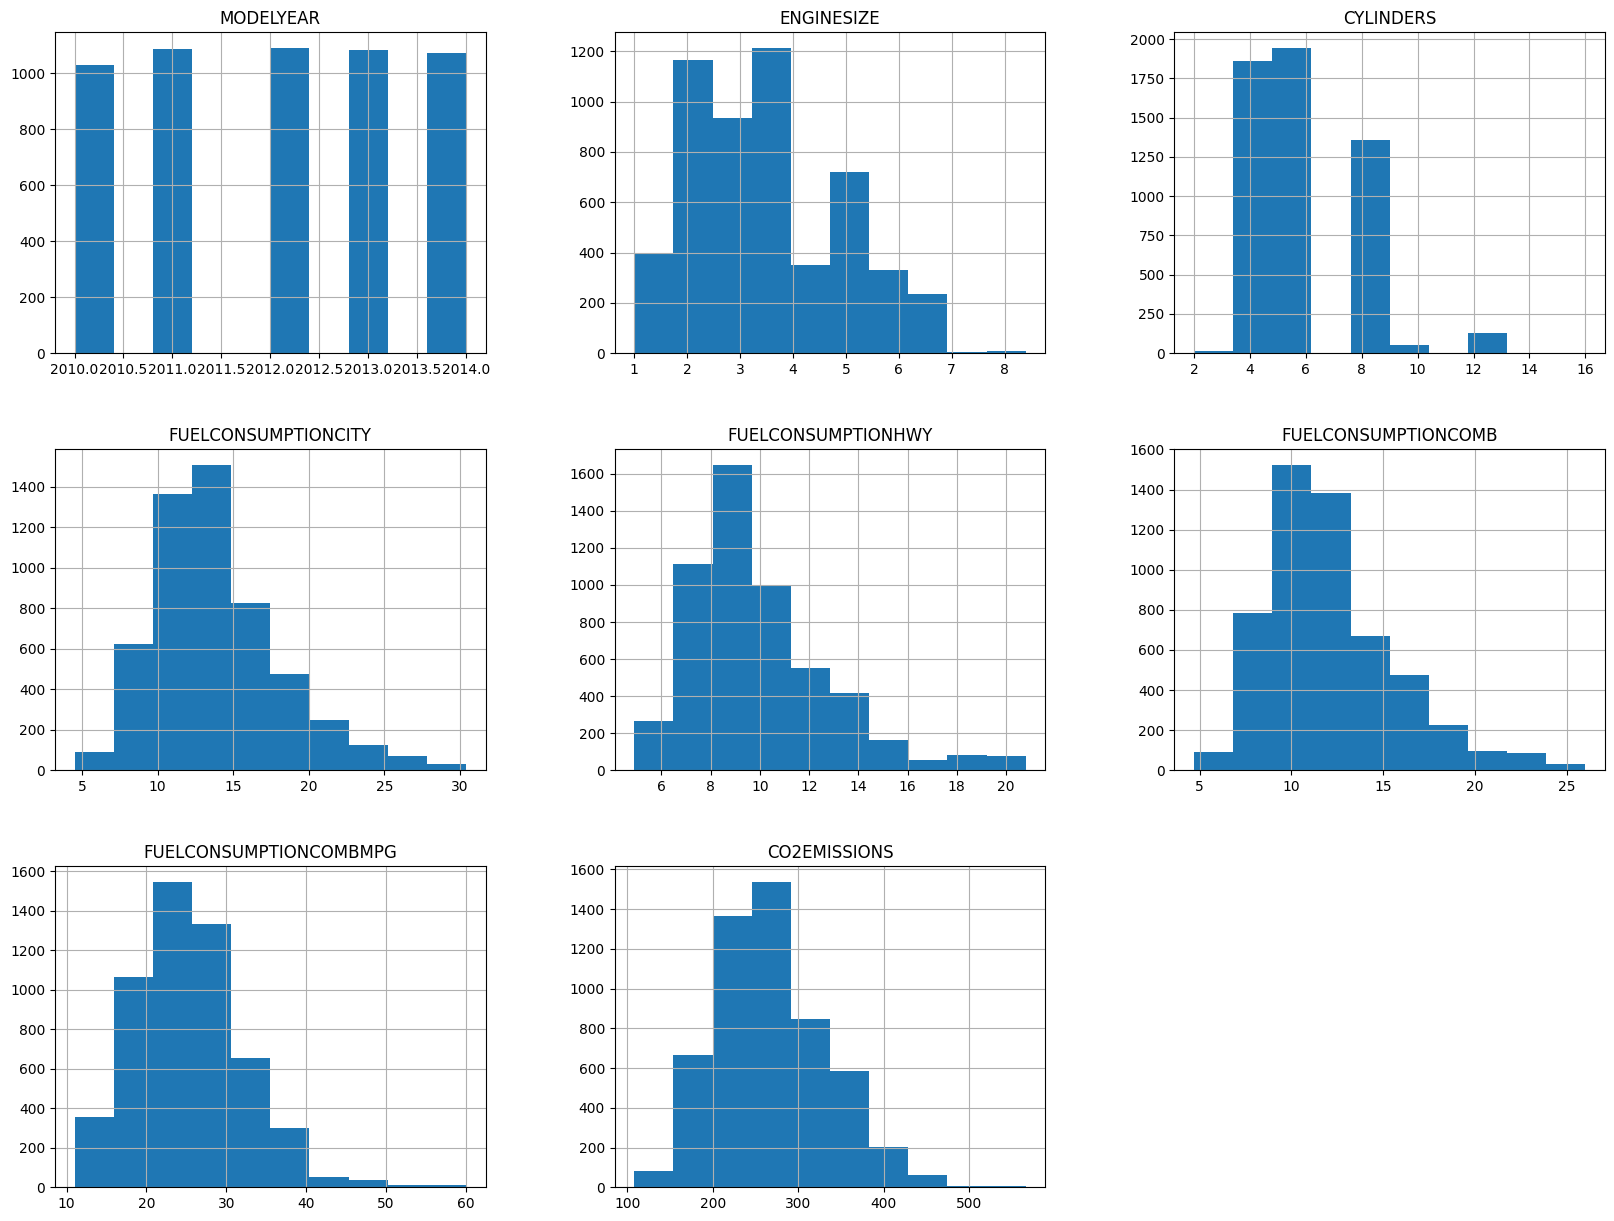

In [13]:
plt.figure(dpi=200)
fcr.hist(figsize = (20,15))
plt.show()

In [14]:
#printing the statistics

fcr.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,5359.0,2012.014742,1.404536,2010.0,2011.0,2012.0,2013.0,2014.0
ENGINESIZE,5359.0,3.491901,1.390957,1.0,2.4,3.5,4.6,8.4
CYLINDERS,5359.0,5.962120,1.872838,2.0,4.0,6.0,8.0,16.0
FUELCONSUMPTIONCITY,5359.0,13.902650,4.162894,4.5,11.0,13.2,16.0,30.4
FUELCONSUMPTIONHWY,5359.0,9.932208,2.807196,4.9,8.0,9.3,11.2,20.8
FUELCONSUMPTIONCOMB,5359.0,12.116328,3.524127,4.7,9.7,11.4,13.9,26.0
FUELCONSUMPTIONCOMBMPG,5359.0,25.168875,6.956407,11.0,20.0,25.0,29.0,60.0
CO2EMISSIONS,5359.0,267.660198,64.317040,108.0,221.0,260.0,305.0,566.0


In [15]:
fcr['FUELCONSUMPTIONCITY'].fillna(fcr['FUELCONSUMPTIONCITY'].median(), inplace = True)
fcr['FUELCONSUMPTIONHWY'].fillna(fcr['FUELCONSUMPTIONHWY'].median(), inplace = True)
fcr['FUELCONSUMPTIONCOMB'].fillna(fcr['FUELCONSUMPTIONCOMB'].median(), inplace = True)
fcr.dropna(subset = ['CYLINDERS'],inplace = True)
fcr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MODELYEAR               5359 non-null   int64  
 1   MAKE                    5359 non-null   object 
 2   MODEL                   5359 non-null   object 
 3   VEHICLECLASS            5359 non-null   object 
 4   ENGINESIZE              5359 non-null   float64
 5   CYLINDERS               5359 non-null   int64  
 6   TRANSMISSION            5359 non-null   object 
 7   FUEL                    5359 non-null   object 
 8   FUELCONSUMPTIONCITY     5359 non-null   float64
 9   FUELCONSUMPTIONHWY      5359 non-null   float64
 10  FUELCONSUMPTIONCOMB     5359 non-null   float64
 11  FUELCONSUMPTIONCOMBMPG  5359 non-null   int64  
 12  CO2EMISSIONS            5359 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 544.4+ KB


In [16]:
fcr.duplicated().sum()

0

In [17]:
fcr.drop_duplicates(inplace = True)
fcr.duplicated().sum()

0

In [18]:
fcr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5359 entries, 0 to 5358
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MODELYEAR               5359 non-null   int64  
 1   MAKE                    5359 non-null   object 
 2   MODEL                   5359 non-null   object 
 3   VEHICLECLASS            5359 non-null   object 
 4   ENGINESIZE              5359 non-null   float64
 5   CYLINDERS               5359 non-null   int64  
 6   TRANSMISSION            5359 non-null   object 
 7   FUEL                    5359 non-null   object 
 8   FUELCONSUMPTIONCITY     5359 non-null   float64
 9   FUELCONSUMPTIONHWY      5359 non-null   float64
 10  FUELCONSUMPTIONCOMB     5359 non-null   float64
 11  FUELCONSUMPTIONCOMBMPG  5359 non-null   int64  
 12  CO2EMISSIONS            5359 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 586.1+ KB


In [19]:
fcr.reset_index(inplace = True)
fcr.drop(fcr[['index']], axis = 1, inplace = True)

In [20]:
object_fcr = fcr.select_dtypes(include = 'object')
num_fcr = fcr.select_dtypes(exclude = 'object')

In [21]:
object_fcr

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUEL
0,ACURA,CSX,COMPACT,AS5,X
1,ACURA,CSX,COMPACT,M5,X
2,ACURA,CSX,COMPACT,M6,Z
3,ACURA,MDX AWD,SUV,AS6,Z
4,ACURA,RDX AWD TURBO,SUV,AS5,Z
...,...,...,...,...,...
5354,VOLVO,XC60 AWD,SUV - SMALL,AS6,X
5355,VOLVO,XC60 AWD,SUV - SMALL,AS6,X
5356,VOLVO,XC70 AWD,SUV - SMALL,AS6,X
5357,VOLVO,XC70 AWD,SUV - SMALL,AS6,X


In [22]:
num_fcr

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTIONCITY,FUELCONSUMPTIONHWY,FUELCONSUMPTIONCOMB,FUELCONSUMPTIONCOMBMPG,CO2EMISSIONS
0,2010,2.0,4,10.9,7.8,9.5,30,219
1,2010,2.0,4,10.0,7.6,8.9,32,205
2,2010,2.0,4,11.6,8.1,10.0,28,230
3,2010,3.7,6,14.8,11.3,13.2,21,304
4,2010,2.3,4,13.2,10.3,11.9,24,274
...,...,...,...,...,...,...,...,...
5354,2014,3.0,6,13.4,9.8,11.8,24,271
5355,2014,3.2,6,13.2,9.5,11.5,25,264
5356,2014,3.0,6,13.4,9.8,11.8,24,271
5357,2014,3.2,6,12.9,9.3,11.3,25,260


In [23]:
object_fcr.FUEL.nunique() 

4

In [24]:
fcr.FUEL.unique()

array(['X', 'Z', 'D', 'E'], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [26]:
#Declares an instance of the object

le = LabelEncoder()
label_data = le.fit_transform(object_fcr[['FUEL']])
df_le = pd.DataFrame(label_data, columns = ['FUEL']) 
new_df_le = pd.concat([num_fcr,df_le], axis = 1)
new_df_le

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTIONCITY,FUELCONSUMPTIONHWY,FUELCONSUMPTIONCOMB,FUELCONSUMPTIONCOMBMPG,CO2EMISSIONS,FUEL
0,2010,2.0,4,10.9,7.8,9.5,30,219,2
1,2010,2.0,4,10.0,7.6,8.9,32,205,2
2,2010,2.0,4,11.6,8.1,10.0,28,230,3
3,2010,3.7,6,14.8,11.3,13.2,21,304,3
4,2010,2.3,4,13.2,10.3,11.9,24,274,3
...,...,...,...,...,...,...,...,...,...
5354,2014,3.0,6,13.4,9.8,11.8,24,271,2
5355,2014,3.2,6,13.2,9.5,11.5,25,264,2
5356,2014,3.0,6,13.4,9.8,11.8,24,271,2
5357,2014,3.2,6,12.9,9.3,11.3,25,260,2


In [30]:
le = LabelEncoder()
le_data2 = le.fit_transform(object_fcr[['MAKE']])
#le_data3 = le.fit_transform(object_fcr[['MODEL']])
le_data4 = le.fit_transform(object_fcr[['VEHICLECLASS']])
le_data5 = le.fit_transform(object_fcr[['TRANSMISSION']])
le_data = le.fit_transform(object_fcr[['FUEL']])
new_cat_le = pd.DataFrame({'MAKE': le_data2, 'VEHICLECLASS': le_data4, 'TRANSMISSION': le_data5, 'FUEL': le_data})
new_cat_le = pd.concat([new_cat_le, num_fcr], axis = 1)
new_cat_le

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.p

,MAKE,VEHICLECLASS,TRANSMISSION,FUEL,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTIONCITY,FUELCONSUMPTIONHWY,FUELCONSUMPTIONCOMB,FUELCONSUMPTIONCOMBMPG,CO2EMISSIONS
0,0,0,10,2,2010,2.0,4,10.9,7.8,9.5,30,219
1,0,0,19,2,2010,2.0,4,10.0,7.6,8.9,32,205
2,0,0,20,3,2010,2.0,4,11.6,8.1,10.0,28,230
3,0,11,11,3,2010,3.7,6,14.8,11.3,13.2,21,304
4,0,11,10,3,2010,2.3,4,13.2,10.3,11.9,24,274
...,...,...,...,...,...,...,...,...,...,...,...,...
5354,44,12,11,2,2014,3.0,6,13.4,9.8,11.8,24,271
5355,44,12,11,2,2014,3.2,6,13.2,9.5,11.5,25,264
5356,44,12,11,2,2014,3.0,6,13.4,9.8,11.8,24,271
5357,44,12,11,2,2014,3.2,6,12.9,9.3,11.3,25,260


# Exploratory Data Analyses

<AxesSubplot: >

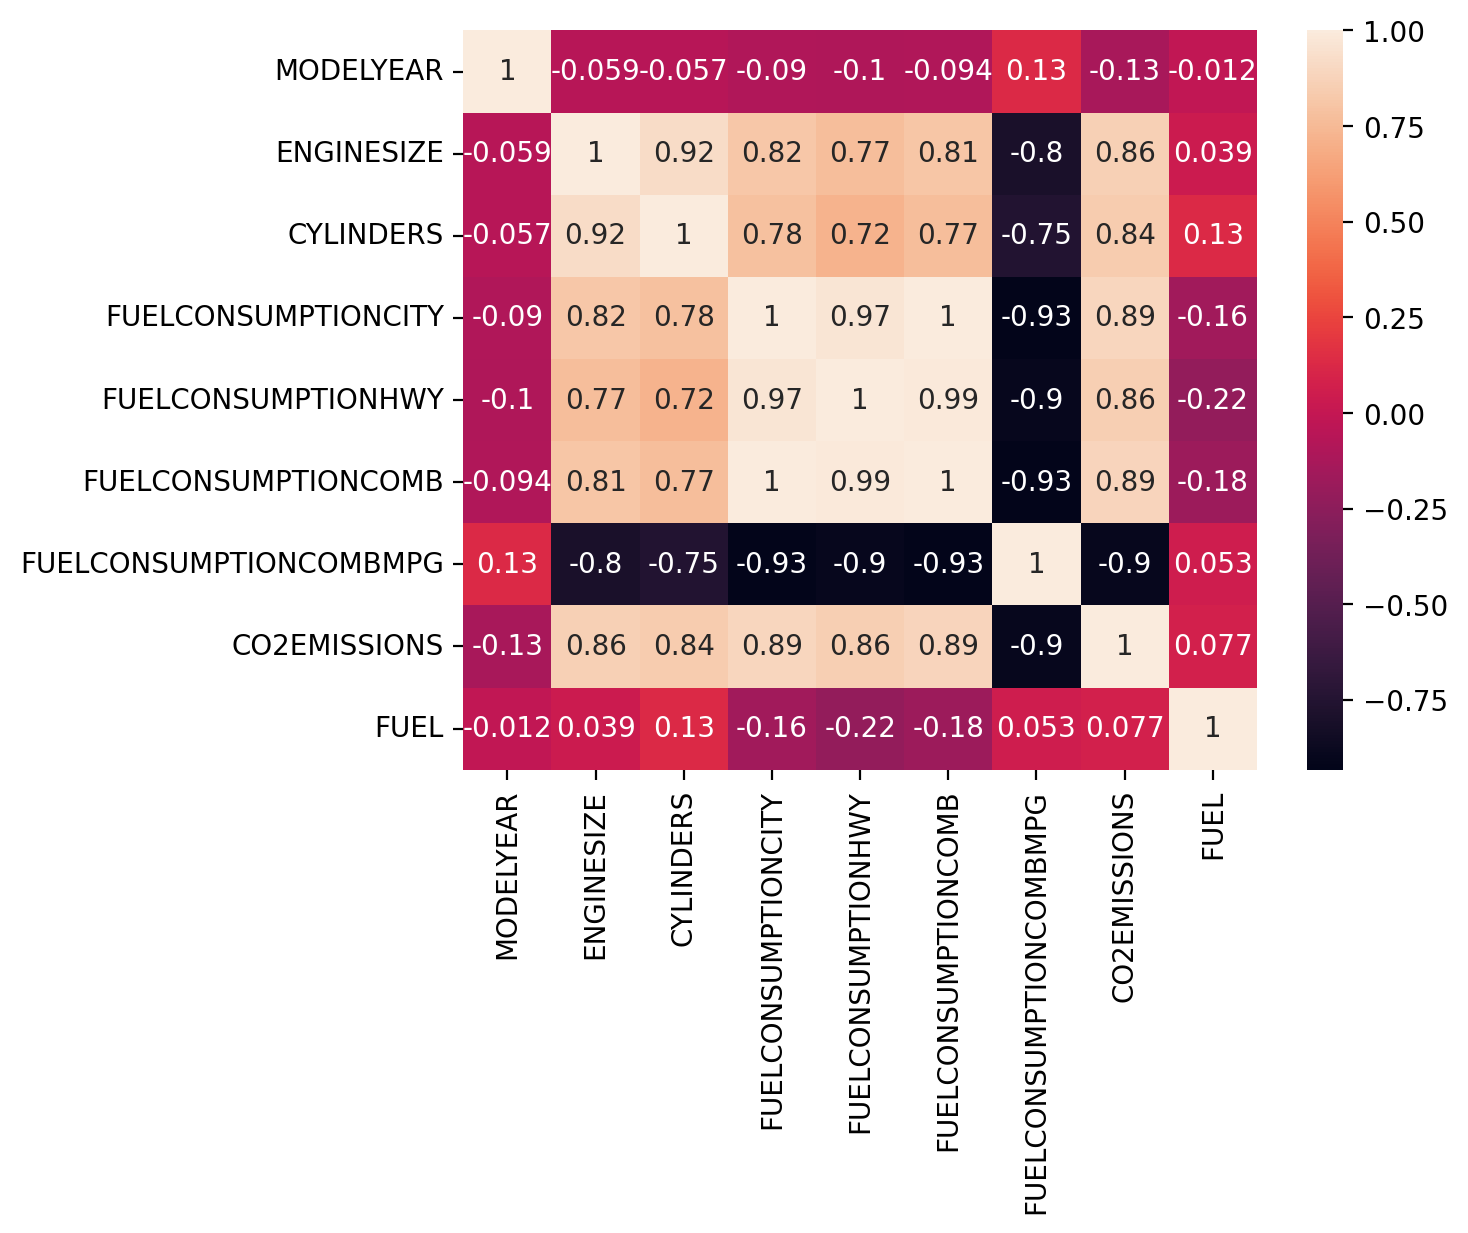

In [31]:
plt.figure(dpi=200)
sns.heatmap(new_df_le.corr(), annot = True) # checking for correlation to see if any of the variables have strong relationship

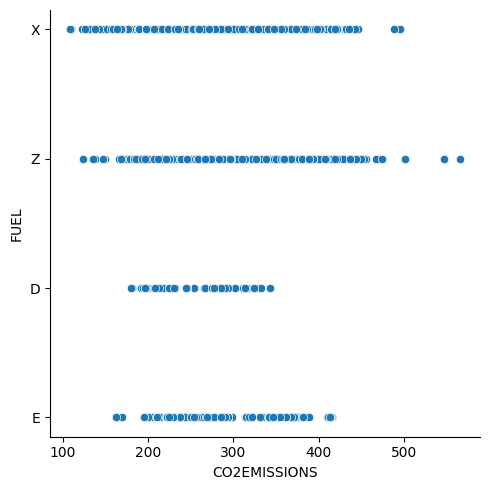

In [32]:
co2_plot = sns.relplot(data=fcr, x = 'CO2EMISSIONS', y = 'FUEL')

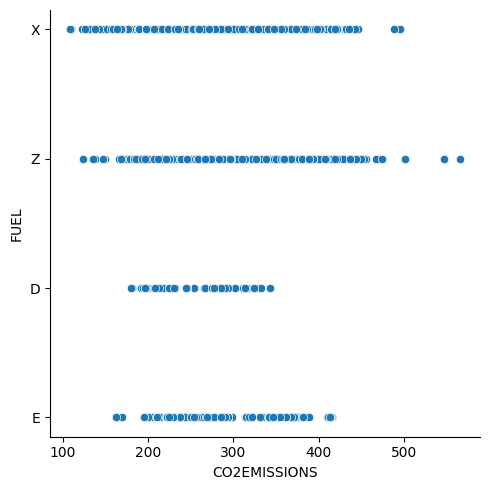

In [33]:
co2_plot2 = sns.relplot(data=fcr, x = 'CO2EMISSIONS', y = 'FUEL')

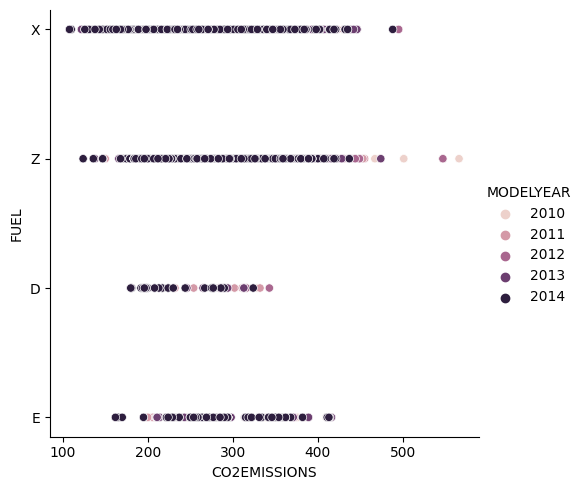

In [34]:
co2_plot3 = sns.relplot(data=fcr, x = 'CO2EMISSIONS', y = 'FUEL', hue = 'MODELYEAR')

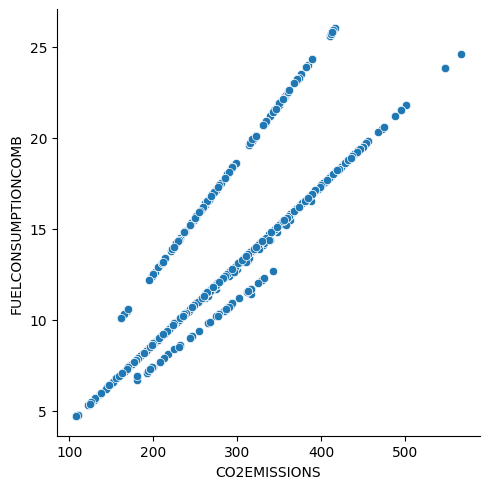

In [35]:
co2_plot4 = sns.relplot(data=new_df_le, x = 'CO2EMISSIONS', y = 'FUELCONSUMPTIONCOMB')

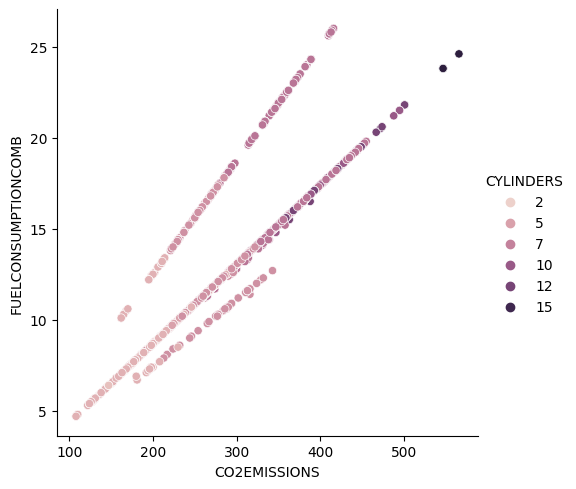

In [36]:
co2_plot5 = sns.relplot(data=new_df_le, x = 'CO2EMISSIONS', y = 'FUELCONSUMPTIONCOMB', hue = 'CYLINDERS')

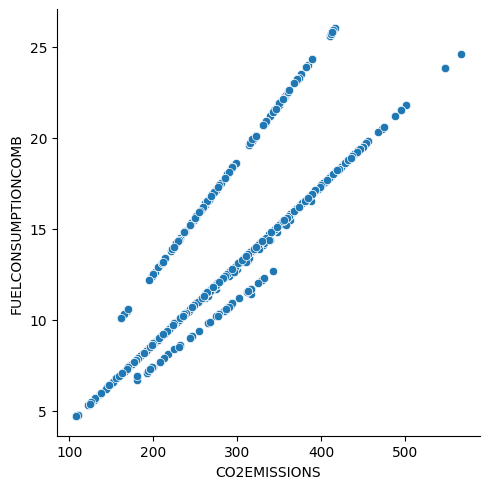

In [46]:
co2_plot6 = sns.relplot(data=new_df_le, x = 'CO2EMISSIONS', y = 'FUELCONSUMPTIONCOMB')

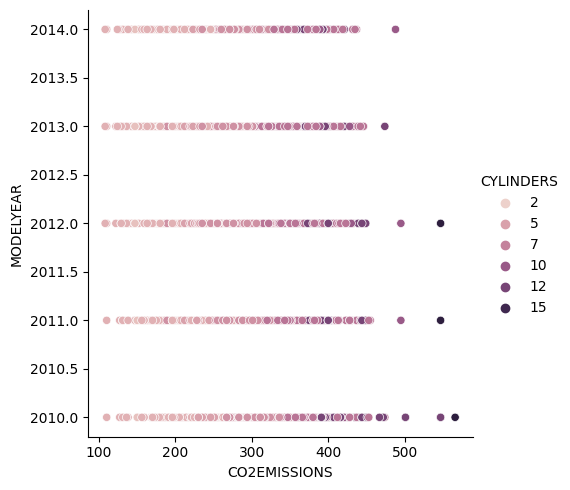

In [47]:
co2_plot7 = sns.relplot(data=new_df_le, x = 'CO2EMISSIONS', y = 'MODELYEAR', hue = 'CYLINDERS')

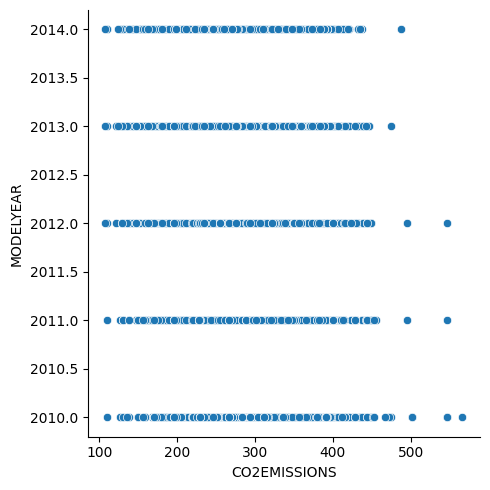

In [48]:
co2_plot8 = sns.relplot(data=new_df_le, x = 'CO2EMISSIONS', y = 'MODELYEAR')

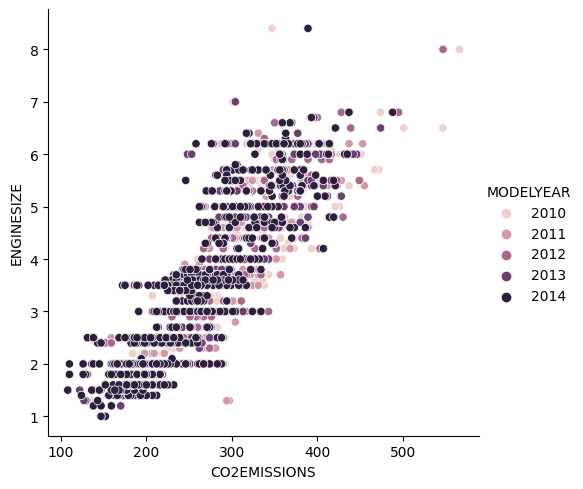

In [49]:
co2_plot9 = sns.relplot(data=new_df_le, x = 'CO2EMISSIONS', y = 'ENGINESIZE', hue = 'MODELYEAR')

In [50]:
model_grp = new_df_le.groupby('MODELYEAR')['CO2EMISSIONS'].mean()
model_grp

MODELYEAR
2010    278.017476
2011    274.428571
2012    269.663611
2013    260.419593
2014    256.116713
Name: CO2EMISSIONS, dtype: float64

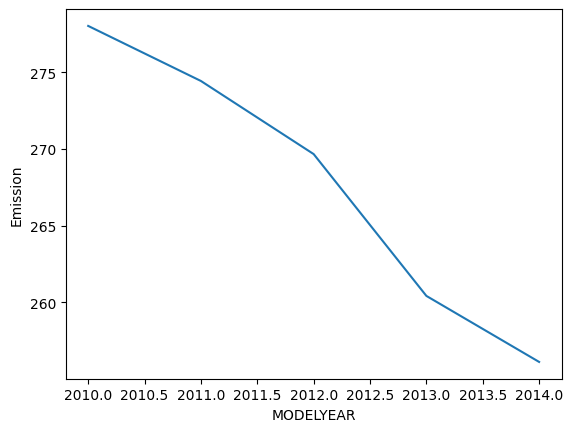

In [51]:
new_df_le.groupby('MODELYEAR')['CO2EMISSIONS'].mean().plot(kind='line')
plt.ylabel("Emission")
plt.show()

In [52]:
new_df_le.columns

Index(['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTIONCITY',
       'FUELCONSUMPTIONHWY', 'FUELCONSUMPTIONCOMB', 'FUELCONSUMPTIONCOMBMPG',
       'CO2EMISSIONS', 'FUEL'],
      dtype='object')

# Building the Model

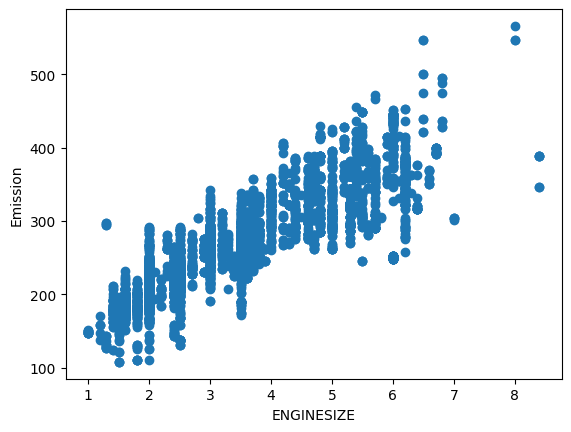

In [53]:
plt.scatter(data=new_df_le, x='ENGINESIZE', y='CO2EMISSIONS')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")
plt.show()

### Modeling

In [68]:
X = new_df_le.drop(['CO2EMISSIONS', 'MODELYEAR'], axis = 1)
y = new_df_le['CO2EMISSIONS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X,y=X_train,y_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
a = new_df_le.drop(['CO2EMISSIONS', 'FUELCONSUMPTIONCITY', 'FUELCONSUMPTIONHWY', 'FUELCONSUMPTIONCOMB'], axis = 1)
b = new_df_le['CO2EMISSIONS']
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42) 
a,b=a_train,b_train
a_train, a_val, b_train, b_val = train_test_split(a, b, test_size=0.2, random_state=42)

In [71]:
engine = new_df_le.drop(['CO2EMISSIONS', 'FUELCONSUMPTIONCITY', 'FUELCONSUMPTIONHWY',
                    'FUELCONSUMPTIONCOMB', 'CYLINDERS', 'FUELCONSUMPTIONCOMB',
                   'FUEL', 'MODELYEAR'], axis = 1)
oxide = new_df_le['CO2EMISSIONS']
engine_train, engine_test, oxide_train, oxide_test = train_test_split(engine, oxide, test_size=0.2, random_state=42) 
engine,oxide=engine_train,oxide_train
engine_train, engine_val, oxide_train, oxide_val = train_test_split(engine, oxide, test_size=0.2, random_state=42)

In [72]:
#Scaling the dataset using the MinMaxScaler
mm_scaler = MinMaxScaler()
ss_scaler = StandardScaler()

In [73]:
X_train = mm_scaler.fit_transform(X_train)
X_test = mm_scaler.transform(X_test)
X_val = mm_scaler.transform(X_val)

In [74]:
a_train = mm_scaler.fit_transform(a_train)
a_test = mm_scaler.transform(a_test)
a_val = mm_scaler.transform(a_val)

In [75]:
engine_train = mm_scaler.fit_transform(engine_train)
engine_test = mm_scaler.transform(engine_test)
engine_val = mm_scaler.transform(engine_val)

In [76]:
#Instantiating the base models
lin = linear_model.LinearRegression()
rf = RandomForestRegressor()
bag = BaggingRegressor()
ext = ExtraTreesRegressor()
dt = DecisionTreeRegressor()

### Multiple Linear Regression

In [77]:
# The model test report
def report_model_test_x(model):
    model.fit(X_train,y_train)
    basem_preds = model.predict(X_test)
    mean_abs = mean_absolute_error(y_test,basem_preds)
    mean_squared = mean_squared_error(y_test,basem_preds)
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}")
    print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}")
    print(f"The result of the coefficient of determination is: {r2_score(y_test,basem_preds):.2f}")

In [78]:
report_model_test_x(lin)

The result of the mean_absolute_error is: 15.03
The result of the root mean squared error is : 21.51
The result of the coefficient of determination is: 0.89


In [79]:
# The model test report
def report_model_test_a(model):
    model.fit(a_train,b_train)
    basem_preds = model.predict(a_test)
    mean_abs = mean_absolute_error(b_test,basem_preds)
    mean_squared = mean_squared_error(b_test,basem_preds)
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}")
    print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}")
    print(f"The result of the coefficient of determination is: {r2_score(y_test,basem_preds):.2f}")

In [80]:
report_model_test_a(lin)

The result of the mean_absolute_error is: 15.51
The result of the root mean squared error is : 22.64
The result of the coefficient of determination is: 0.88


### Simple Regression Model

In [81]:
# The model test report
def report_model_test_engine(model):
    model.fit(engine_train,oxide_train)
    basem_preds = model.predict(engine_test)
    mean_abs = mean_absolute_error(oxide_test,basem_preds)
    mean_squared = mean_squared_error(oxide_test,basem_preds)
    print(f"The result of the mean_absolute_error is: {mean_abs:.2f}")
    print(f"The result of the root mean squared error is : {np.sqrt(mean_squared):.2f}")
    print(f"The result of the coefficient of determination is: {r2_score(y_test,basem_preds):.2f}")

In [82]:
report_model_test_engine(lin)

The result of the mean_absolute_error is: 15.83
The result of the root mean squared error is : 24.21
The result of the coefficient of determination is: 0.86


### Multiple Random Forest Regressor

In [83]:
report_model_test_x(rf)

The result of the mean_absolute_error is: 0.32
The result of the root mean squared error is : 2.30
The result of the coefficient of determination is: 1.00


In [84]:
report_model_test_a(rf)

The result of the mean_absolute_error is: 2.53
The result of the root mean squared error is : 3.88
The result of the coefficient of determination is: 1.00


### Simple Random Forest 

In [85]:
report_model_test_engine(rf)

The result of the mean_absolute_error is: 4.09
The result of the root mean squared error is : 10.69
The result of the coefficient of determination is: 0.97


### Multiple Bagging Regressor

In [86]:
report_model_test_x(bag)

The result of the mean_absolute_error is: 0.31
The result of the root mean squared error is : 2.16
The result of the coefficient of determination is: 1.00


In [87]:
report_model_test_a(bag)

The result of the mean_absolute_error is: 2.67
The result of the root mean squared error is : 4.48
The result of the coefficient of determination is: 1.00


### Simple Bagging Regressor

In [88]:
report_model_test_engine(bag)

The result of the mean_absolute_error is: 4.21
The result of the root mean squared error is : 10.82
The result of the coefficient of determination is: 0.97


### Multiple Extra Tree Regressor

In [89]:
report_model_test_x(ext)

The result of the mean_absolute_error is: 0.14
The result of the root mean squared error is : 0.82
The result of the coefficient of determination is: 1.00


In [90]:
report_model_test_a(ext)

The result of the mean_absolute_error is: 2.41
The result of the root mean squared error is : 3.60
The result of the coefficient of determination is: 1.00


### Simple Extra Tree Regressor

In [91]:
report_model_test_engine(ext)

The result of the mean_absolute_error is: 3.90
The result of the root mean squared error is : 10.40
The result of the coefficient of determination is: 0.97


### Multiple Decision Tree Regressor

In [92]:
report_model_test_x(dt)

The result of the mean_absolute_error is: 0.23
The result of the root mean squared error is : 4.23
The result of the coefficient of determination is: 1.00


In [93]:
report_model_test_a(dt)

The result of the mean_absolute_error is: 2.40
The result of the root mean squared error is : 3.69
The result of the coefficient of determination is: 1.00


### Simple Decision Tree Regressor

In [94]:
report_model_test_engine(dt)

The result of the mean_absolute_error is: 4.04
The result of the root mean squared error is : 10.97
The result of the coefficient of determination is: 0.97


## Classification of the Dataset

In [95]:
def onehot_encode(train_set, val_set):

    cat_cols = [x for x in train_set.columns if train_set[x].dtype==object]

    encoder = OneHotEncoder(handle_unknown='ignore')

    train_cat_encoded = encoder.fit_transform(train_set[cat_cols]).toarray()
    val_cat_encoded = encoder.transform(val_set[cat_cols]).toarray()

    feature_names = encoder.get_feature_names_out()

    train_cat_encoded = pd.DataFrame(train_cat_encoded, columns=feature_names, 
                                       index=train_set.index)

    val_cat_encoded = pd.DataFrame(val_cat_encoded, columns=feature_names, 
                                     index=val_set.index)

    train_set_encoded = pd.concat([train_set, train_cat_encoded], axis=1)
    train_set_encoded.drop(cat_cols, axis=1, inplace=True)

    val_set_encoded = pd.concat([val_set, val_cat_encoded], axis=1)
    val_set_encoded.drop(cat_cols, axis=1, inplace=True)

    return train_set_encoded, val_set_encoded

### Fuel

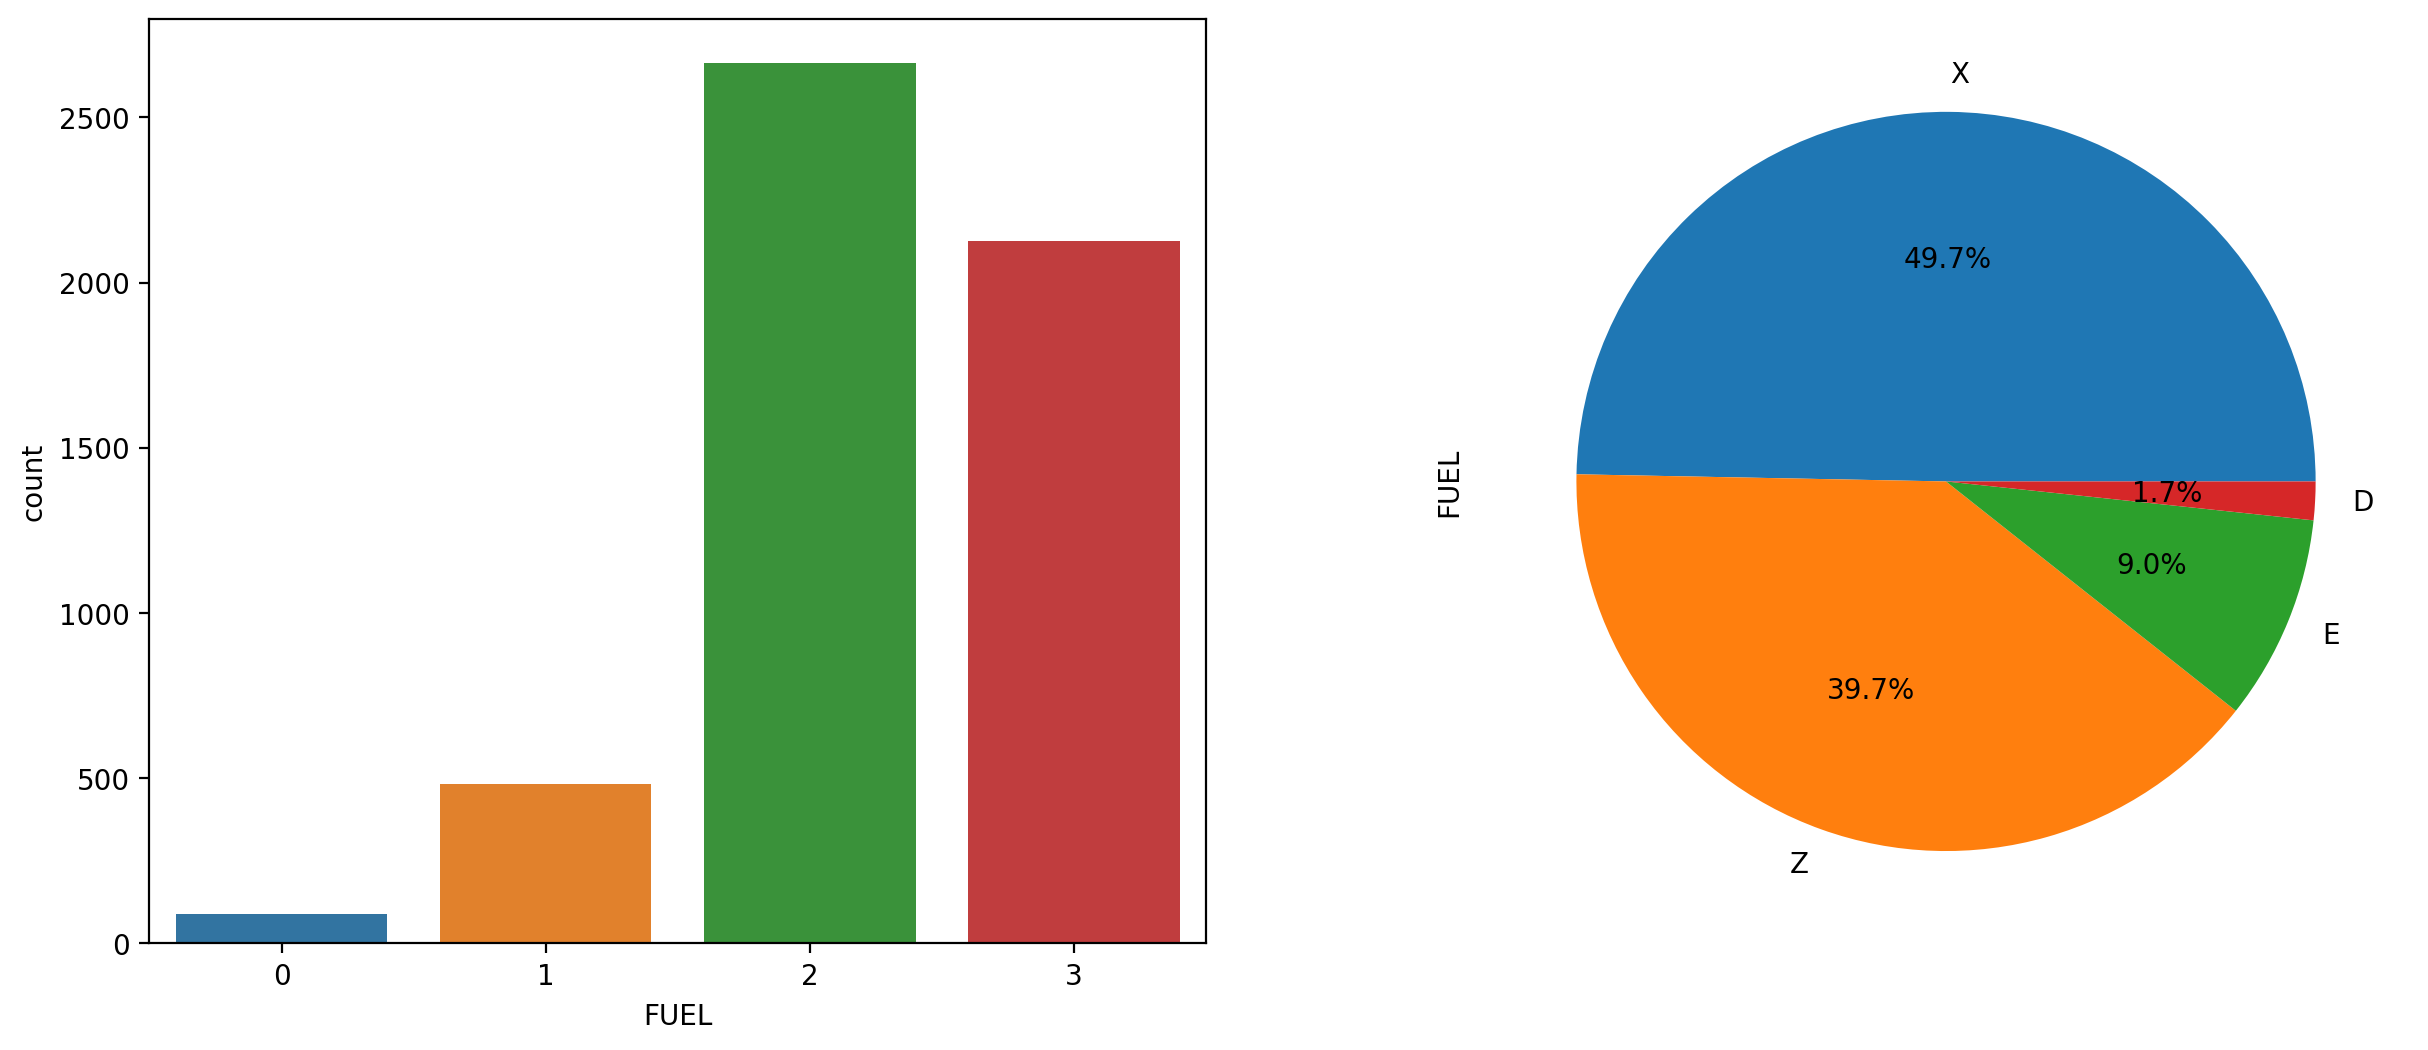

In [101]:
fig, ax_position=plt.subplots(1,2,figsize=(15,6),dpi=200) # creates the framework for the plotting
a = sns.countplot(x='FUEL', data=new_df_le, ax=ax_position[0]) #ax_position[0] specifies plot to be in index 0
a= fcr['FUEL'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1]) #ax_position[1] specifies plot to be in index 1

In [102]:
X = new_df_le.drop('FUEL', axis = 1) 
y = new_df_le['FUEL']

In [103]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors = 2) # The object is created 
X_res, y_res = sm.fit_resample(X, y) # The object is applied
X, y = X_res, y_res # reassigning the balanced dataset to X,y

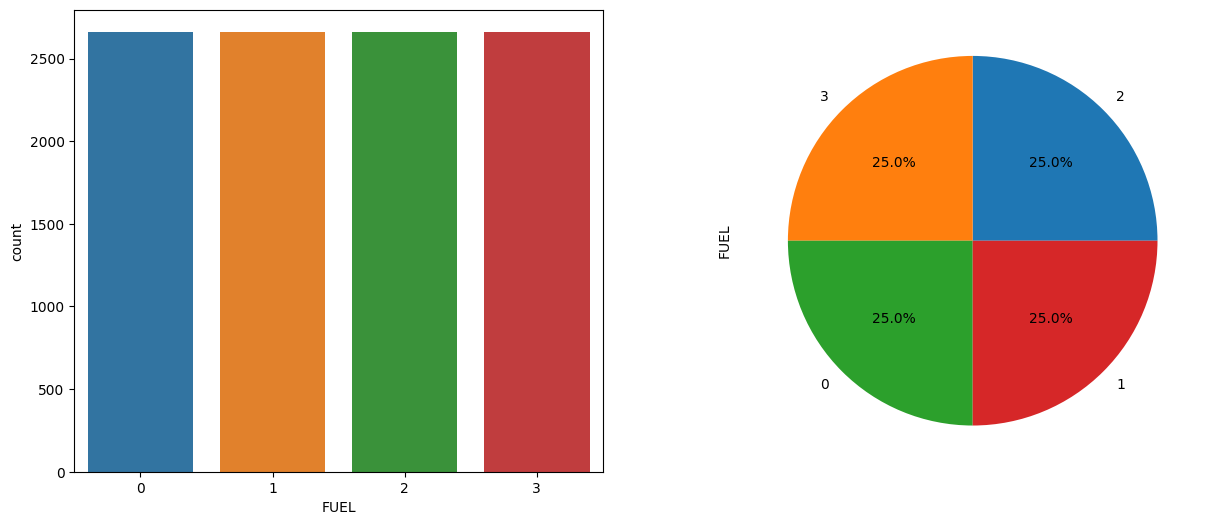

In [104]:
# Plot of the dataset 
df_bal = pd.concat([X_res,y_res], axis = 1) # creating a dataframe for the balanced data
fig, ax=plt.subplots(1,2,figsize=(15,6)) # creating the axis shell for subplot
a = sns.countplot(x='FUEL',data=df_bal, ax=ax[0]) # assigning each of the plot to the axis shell
a= df_bal['FUEL'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) # assigning each of the plot to the axis shell

In [109]:
# feature matrix and target vector
X = fcr.drop('FUEL', axis=1)
y = fcr['FUEL']

numerical_columns = [x for x in X.columns if X[x].dtype in [int, float]]
categorical_columns = [x for x in X.columns if X[x].dtype==object]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=49)
 
scaler = MinMaxScaler()

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])

X_train_encoded, X_val_encoded = onehot_encode(X_train, X_val)

classif_model = LogisticRegression()

classif_model.fit(X_train_encoded, y_train)

classes = classif_model.predict(X_val_encoded)

print(classification_report(y_val, classes))

              precision    recall  f1-score   support

           D       0.00      0.00      0.00        15
           E       1.00      0.98      0.99        99
           X       0.74      0.73      0.73       539
           Z       0.67      0.71      0.69       419

    accuracy                           0.73      1072
   macro avg       0.60      0.60      0.60      1072
weighted avg       0.73      0.73      0.73      1072



C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Vehicle Class

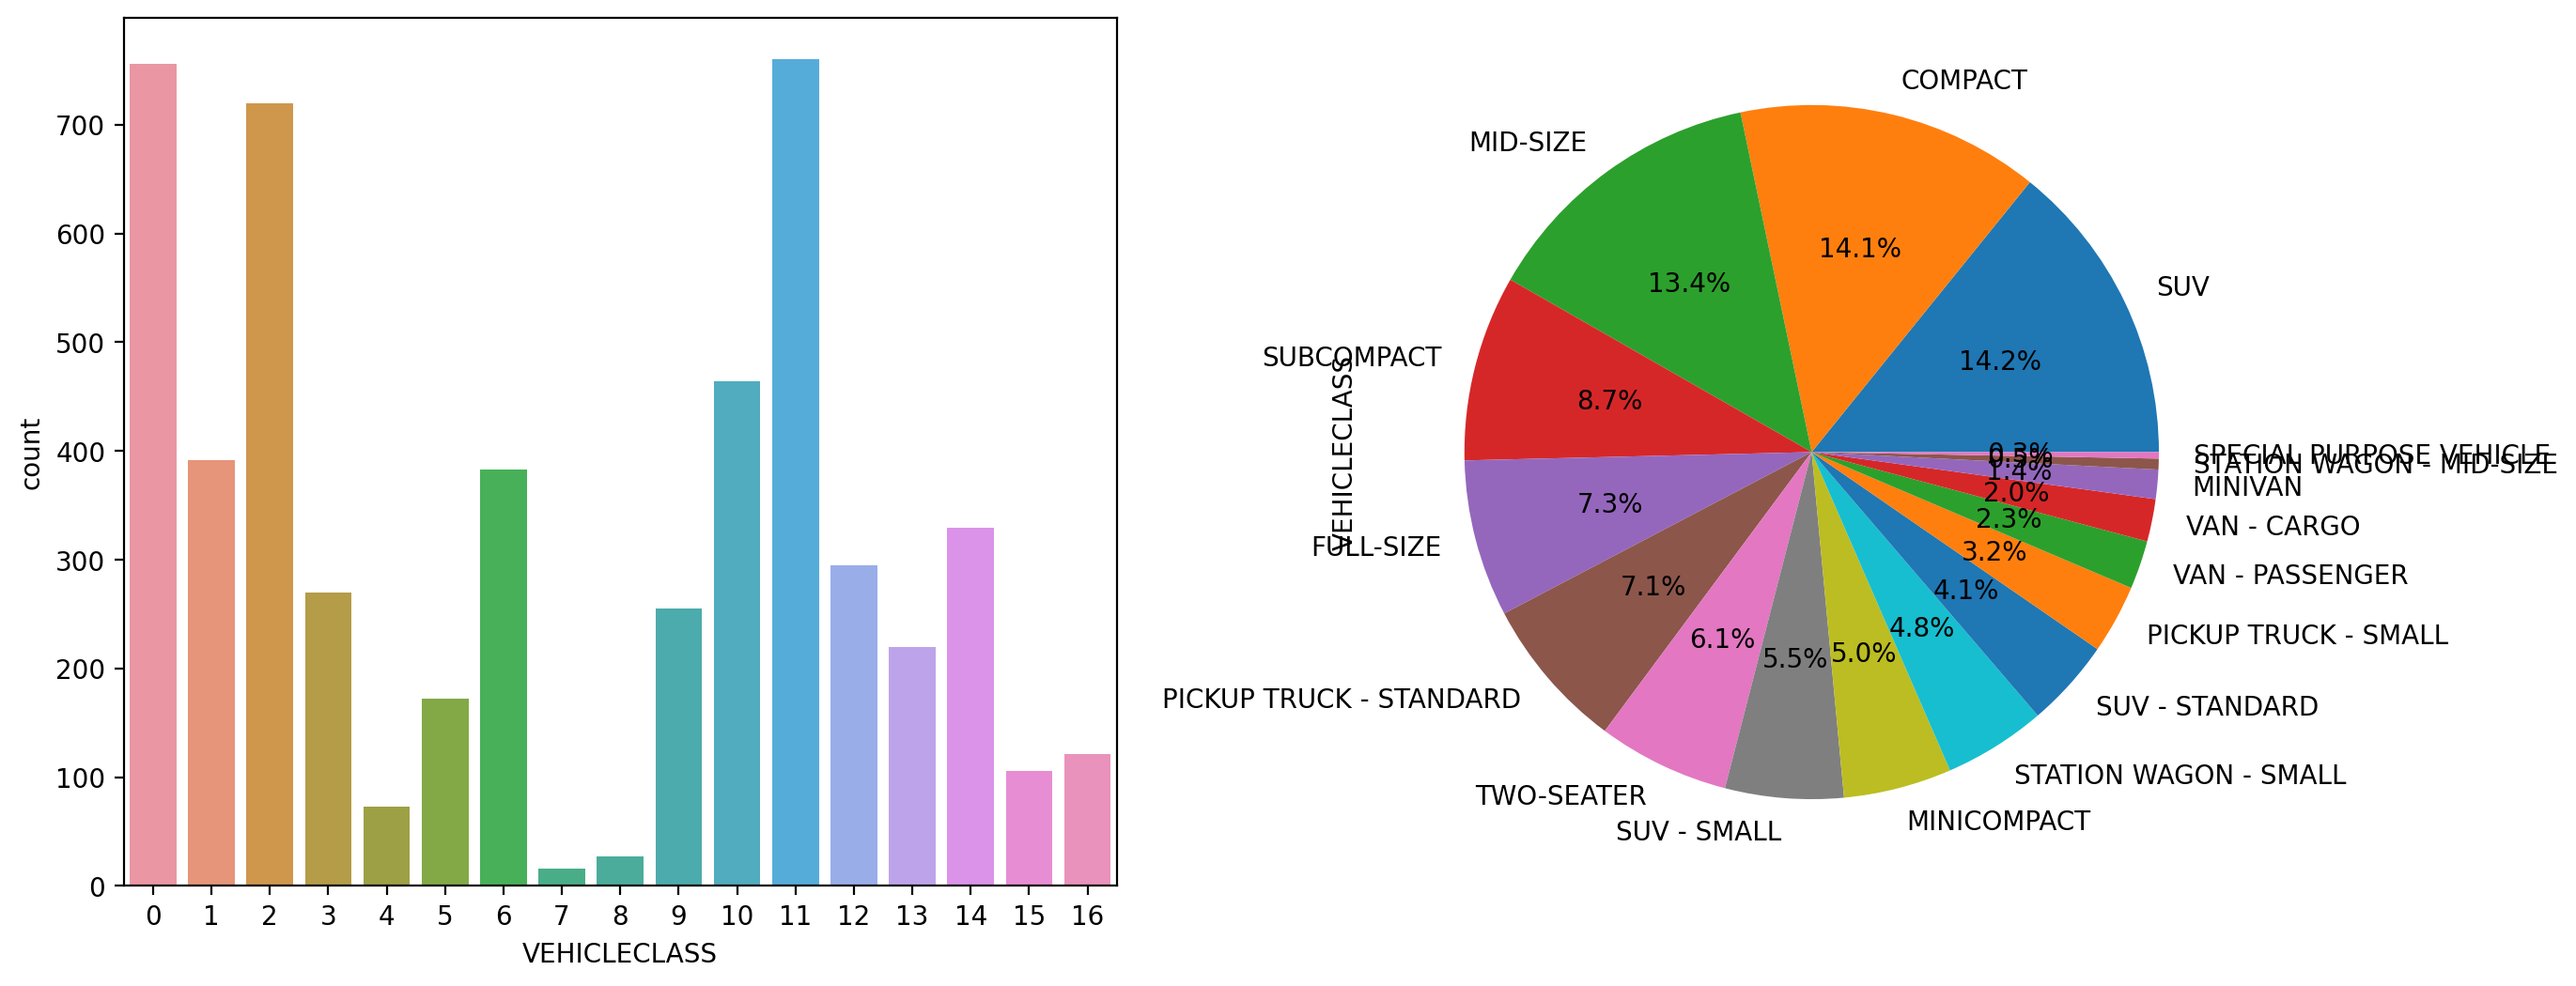

In [110]:
fig, ax_position=plt.subplots(1,2,figsize=(15,6),dpi=200) # creates the framework for the plotting
a = sns.countplot(x='VEHICLECLASS', data=new_cat_le, ax=ax_position[0]) #ax_position[0] specifies plot to be in index 0
a= fcr['VEHICLECLASS'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1]) #ax_position[1] specifies plot to be in index 1

In [112]:
X = new_cat_le.drop(['MAKE', 'VEHICLECLASS', 'TRANSMISSION', 'FUEL'], axis = 1) 
y = new_cat_le['VEHICLECLASS']

In [113]:
sm = SMOTE(random_state=42, k_neighbors = 2) 
X_res, y_res = sm.fit_resample(X, y)
X, y = X_res, y_res 

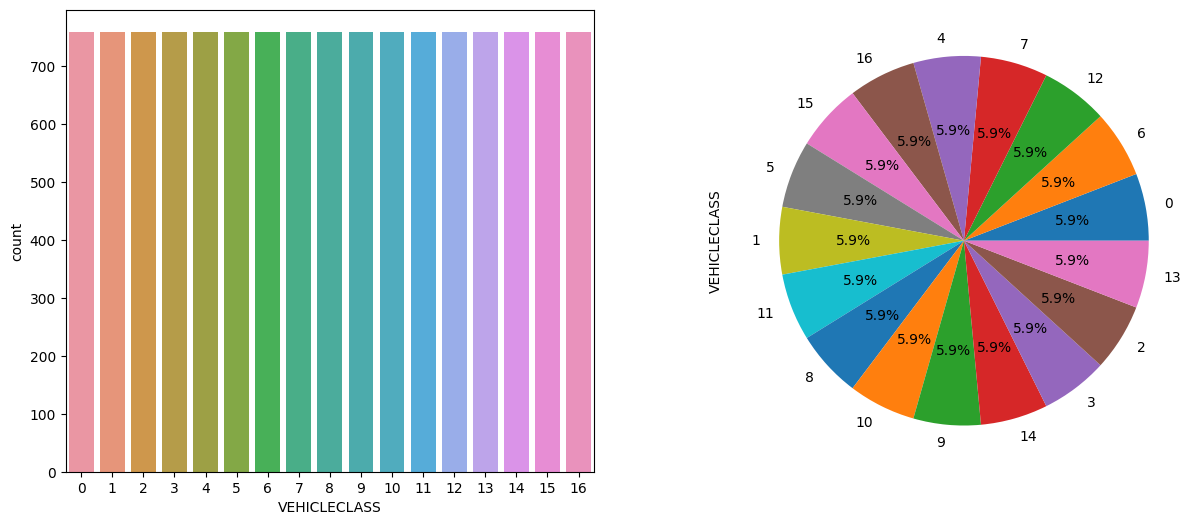

In [114]:
# Plot of the dataset 
df_bal = pd.concat([X_res,y_res], axis = 1) 
fig, ax=plt.subplots(1,2,figsize=(15,6)) 
a = sns.countplot(x='VEHICLECLASS',data=df_bal, ax=ax[0])
a= df_bal['VEHICLECLASS'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1]) 

In [115]:
#grouping by the numerical and categorical values
# split the train and test

X = fcr.drop('VEHICLECLASS', axis=1)
y = fcr['VEHICLECLASS']

numerical_columns = [x for x in X.columns if X[x].dtype in [int, float]]
categorical_columns = [x for x in X.columns if X[x].dtype==object]


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=49)

scaler = MinMaxScaler()

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])

X_train_encoded, X_val_encoded = onehot_encode(X_train, X_val)

classif_model = LogisticRegression()

classif_model.fit(X_train_encoded, y_train)


classes = classif_model.predict(X_val_encoded)

print(classification_report(y_val, classes))

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                          precision    recall  f1-score   support

                 COMPACT       0.24      0.70      0.36       148
               FULL-SIZE       0.00      0.00      0.00        79
                MID-SIZE       0.11      0.05      0.07       146
             MINICOMPACT       0.00      0.00      0.00        54
                 MINIVAN       0.00      0.00      0.00        20
    PICKUP TRUCK - SMALL       0.00      0.00      0.00        23
 PICKUP TRUCK - STANDARD       0.16      0.12      0.14        85
 SPECIAL PURPOSE VEHICLE       0.00      0.00      0.00         2
STATION WAGON - MID-SIZE       0.00      0.00      0.00         3
   STATION WAGON - SMALL       0.00      0.00      0.00        54
              SUBCOMPACT       0.00      0.00      0.00        92
                     SUV       0.19      0.58      0.28       156
             SUV - SMALL       0.00      0.00      0.00        58
          SUV - STANDARD       0.00      0.00      0.00        44
         

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Transmission

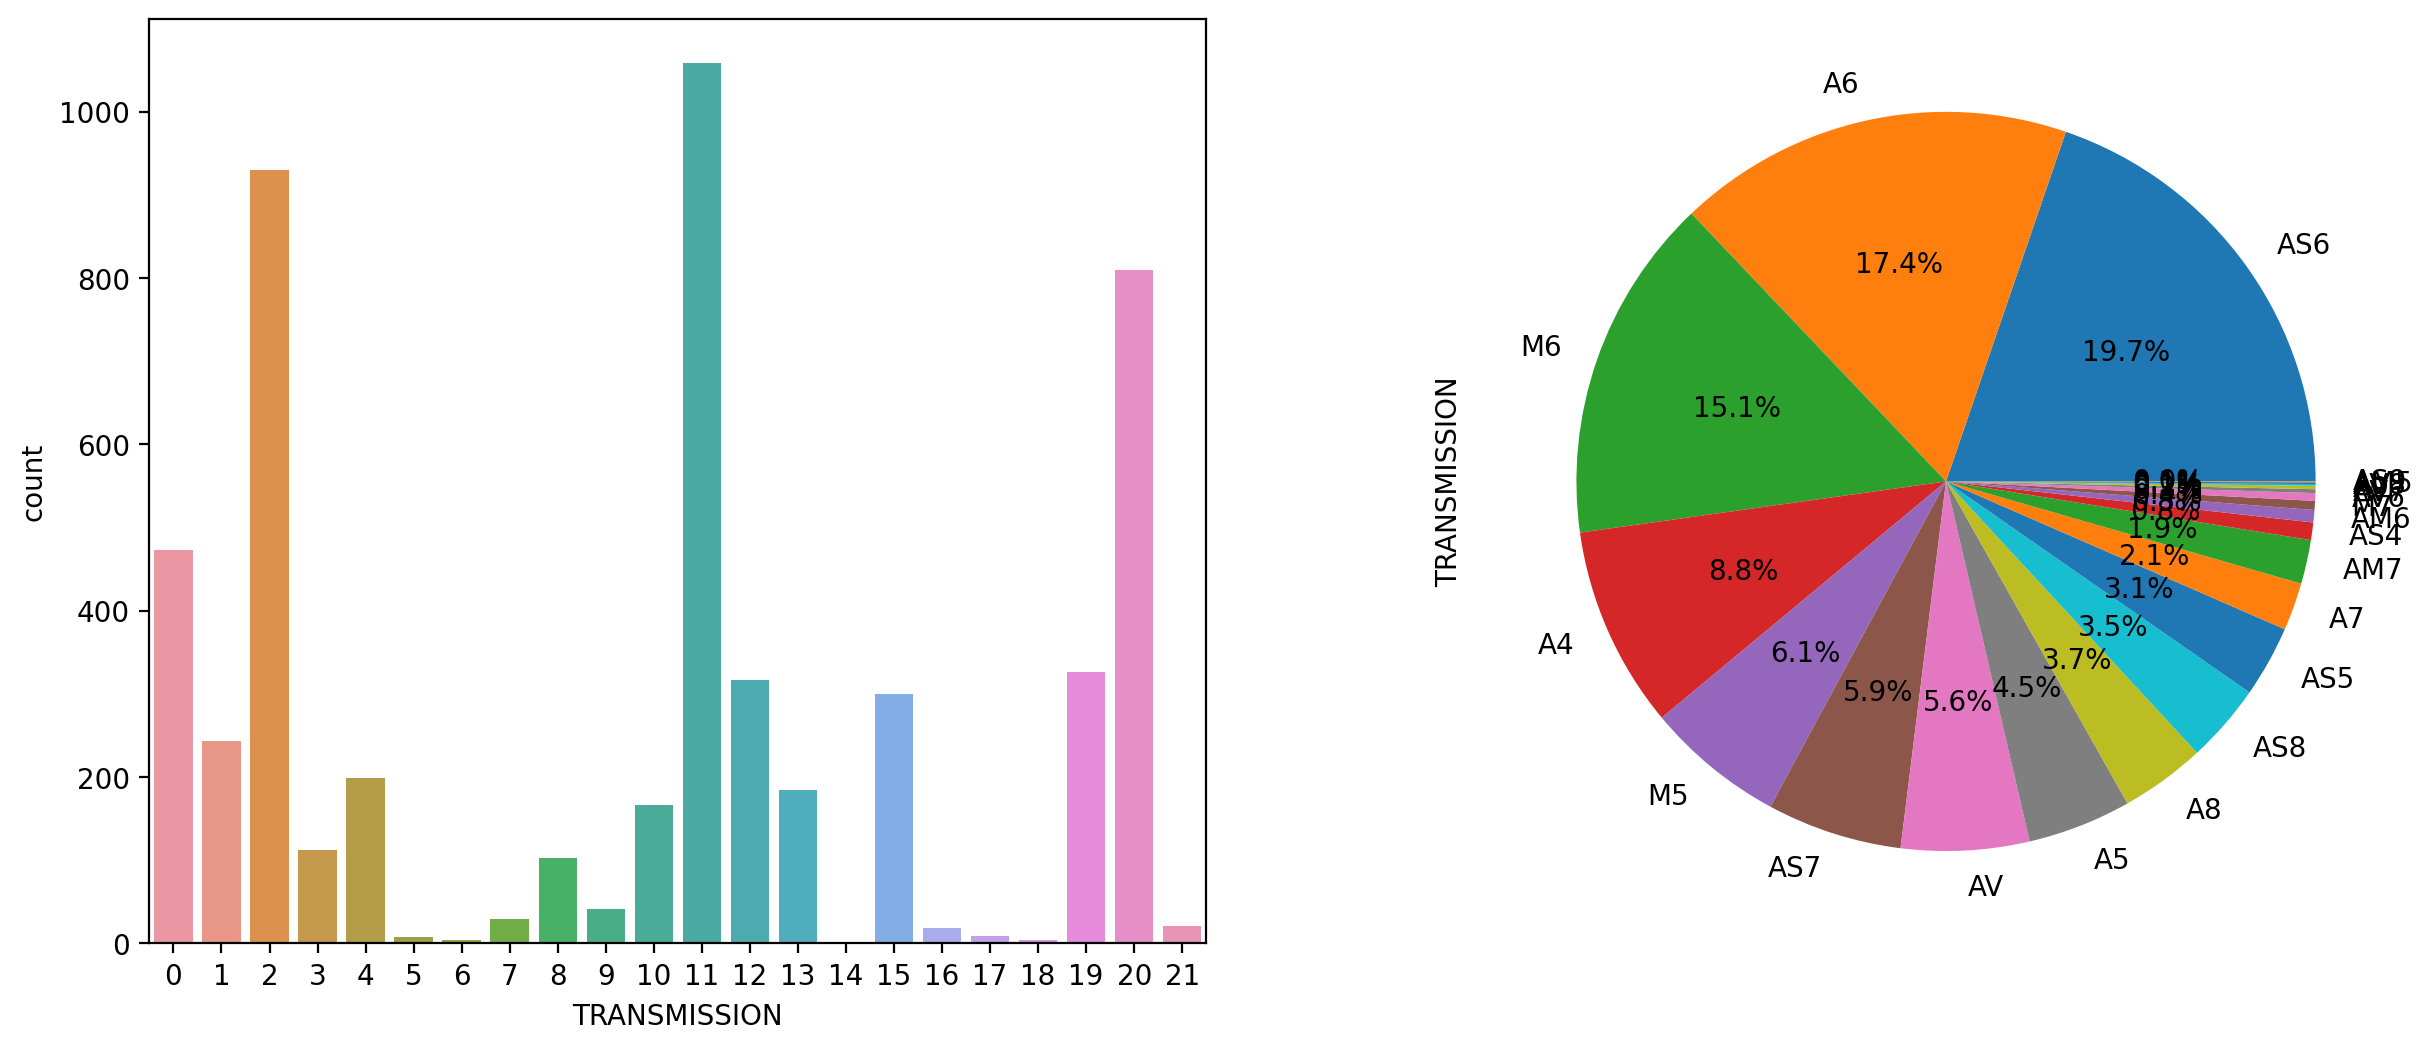

In [117]:
#creating the framework for plotting

fig, ax_position=plt.subplots(1,2,figsize=(15,6),dpi=200) 
a = sns.countplot(x='TRANSMISSION', data=new_cat_le, ax=ax_position[0]) 
a= fcr['TRANSMISSION'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax_position[1])

In [119]:
X = new_cat_le.drop(['MAKE', 'VEHICLECLASS', 'TRANSMISSION', 'FUEL'], axis = 1) 
y = new_cat_le['TRANSMISSION']

In [121]:
try:
    sm = SMOTE(random_state=42, k_neighbors = 2) # The object is created 
    X_res, y_res = sm.fit_resample(X, y) # The object is applied
    X, y = X_res, y_res # reassigning the balanced dataset to X,y
except ValueError as v_err:
    print(v_err)

Expected n_neighbors <= n_samples,  but n_samples = 2, n_neighbors = 3


Could not interpret input 'TRANSMISSION'


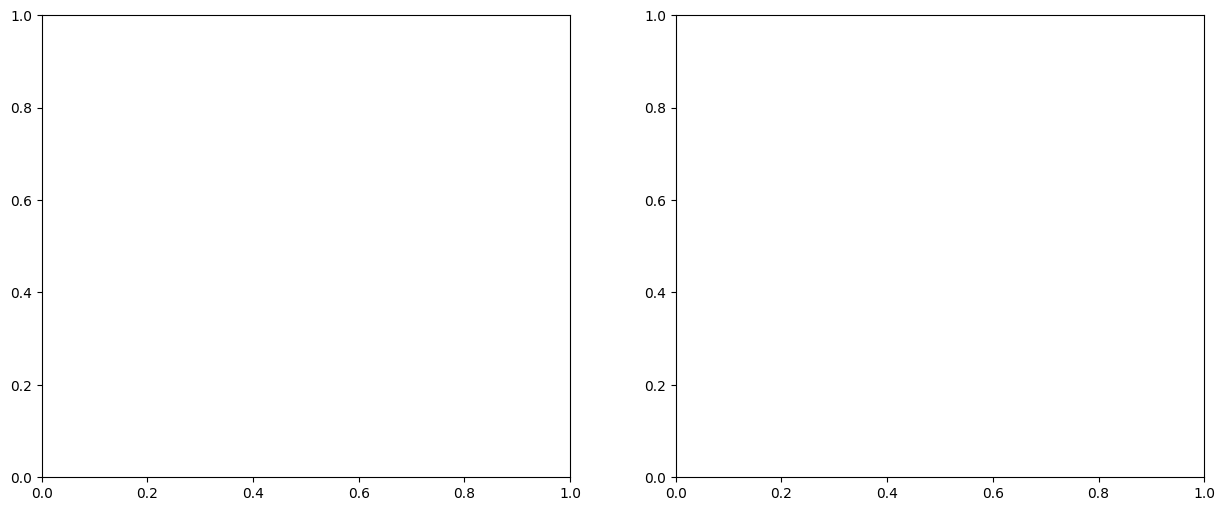

In [122]:
#plotting the datasets 
try:
    df_bal = pd.concat([X_res,y_res], axis = 1) 
    fig, ax=plt.subplots(1,2,figsize=(15,6)) 
    a = sns.countplot(x='TRANSMISSION',data=df_bal, ax=ax[0]) 
    a= df_bal['TRANSMISSION'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])
except ValueError as v_err:
    print(v_err)

In [123]:
# feature matrix and target vector
X = fcr.drop('TRANSMISSION', axis=1)
y = fcr['TRANSMISSION']

numerical_columns = [x for x in X.columns if X[x].dtype in [int, float]]
categorical_columns = [x for x in X.columns if X[x].dtype==object]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=49)
 
scaler = MinMaxScaler()

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])

X_train_encoded, X_val_encoded = onehot_encode(X_train, X_val)

classif_model = LogisticRegression()

classif_model.fit(X_train_encoded, y_train)

classes = classif_model.predict(X_val_encoded)

print(classification_report(y_val, classes))

              precision    recall  f1-score   support

          A4       0.00      0.00      0.00       102
          A5       0.00      0.00      0.00        51
          A6       0.27      0.54      0.36       184
          A7       0.00      0.00      0.00        20
          A8       0.00      0.00      0.00        40
          A9       0.00      0.00      0.00         2
         AM5       0.00      0.00      0.00         2
         AM6       0.00      0.00      0.00         5
         AM7       0.00      0.00      0.00        25
         AS4       0.00      0.00      0.00        13
         AS5       0.00      0.00      0.00        30
         AS6       0.24      0.71      0.35       210
         AS7       0.00      0.00      0.00        67
         AS8       0.00      0.00      0.00        33
          AV       0.21      0.23      0.22        60
         AV6       0.00      0.00      0.00         3
         AV7       0.00      0.00      0.00         1
         AV8       0.00    

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:134

### Model

In [124]:
# feature matrix and target vector
X = fcr.drop('MODEL', axis=1)
y = fcr['MODEL']

numerical_columns = [x for x in X.columns if X[x].dtype in [int, float]]
categorical_columns = [x for x in X.columns if X[x].dtype==object]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=49)

scaler = MinMaxScaler()

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])

X_train_encoded, X_val_encoded = onehot_encode(X_train, X_val)

classif_model = LogisticRegression()

classif_model.fit(X_train_encoded, y_train)

classes = classif_model.predict(X_val_encoded)

print(classification_report(y_val, classes))

KeyError: "['MODEL'] not found in axis"

### Make

In [125]:
# feature matrix and target vector
X = fcr.drop('MAKE', axis=1)
y = fcr['MAKE']

numerical_columns = [x for x in X.columns if X[x].dtype in [int, float]]
categorical_columns = [x for x in X.columns if X[x].dtype==object]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=49)
 
scaler = MinMaxScaler()

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])

X_train_encoded, X_val_encoded = onehot_encode(X_train, X_val)

classif_model = LogisticRegression()

classif_model.fit(X_train_encoded, y_train)

classes = classif_model.predict(X_val_encoded)

print(classification_report(y_val, classes))

               precision    recall  f1-score   support

        ACURA       0.00      0.00      0.00        12
 ASTON MARTIN       0.00      0.00      0.00         4
         AUDI       0.00      0.00      0.00        47
      BENTLEY       0.00      0.00      0.00         6
          BMW       0.00      0.00      0.00        74
        BUICK       0.00      0.00      0.00        12
     CADILLAC       0.00      0.00      0.00        27
    CHEVROLET       0.11      0.47      0.18       116
     CHRYSLER       0.00      0.00      0.00        20
        DODGE       0.00      0.00      0.00        39
         FIAT       0.00      0.00      0.00         7
         FORD       0.04      0.14      0.07        83
          GMC       0.18      0.31      0.23        68
        HONDA       0.00      0.00      0.00        24
       HUMMER       0.00      0.00      0.00         3
      HYUNDAI       0.00      0.00      0.00        26
     INFINITI       0.00      0.00      0.00        22
       JA

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:134